<a href="https://colab.research.google.com/github/francinamudzingwa26/fran/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predicting Customer Churn

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.preprocessing import LabelEncoder #Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values
from sklearn.preprocessing import StandardScaler # standardizes a feature by subtracting the mean and then scaling to unit variance. 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')   #uploaded = files.upload import from PC

In [ ]:
df_1 =pd.read_csv('/content/drive/My Drive/Colab Notebooks/churn.csv')

In [ ]:
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**ANALYZE THE DATA**


In [ ]:
df_1.shape

(7043, 21)

In [ ]:
#show all columns
df_1.columns   #.values

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#printing unique values of the categorical variables
print(df_1['gender'].unique())
print(df_1['Dependents'].unique())
print(df_1['PhoneService'].unique())
print(df_1['SeniorCitizen'].unique())
print(df_1['MultipleLines'].unique())
print(df_1['InternetService'].unique())

['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
[0 1]
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']


In [ ]:
df_1.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#checking missing values
df_1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# how many people are churning
df_1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

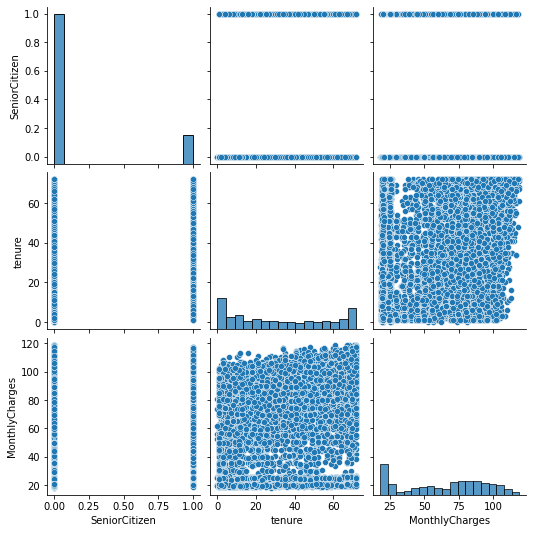

In [ ]:
sns.pairplot(df_1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


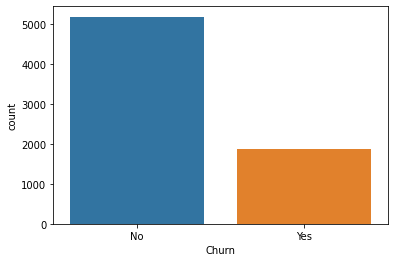

In [ ]:
# visualize the count of customer churn
sns.countplot(df_1['Churn'])

In [ ]:
# The percentage of customers that are leaving
num_retained = df_1[df_1.Churn == 'No'].shape[0]
num_churned = df_1[df_1.Churn == 'Yes'].shape[0]

print(num_churned / (num_retained + num_churned) * 100, '% of customers left the company.')
print(num_retained / (num_retained + num_churned) * 100, '% of customers stayed with the company.')

26.536987079369588 % of customers left the company.
73.4630129206304 % of customers stayed with the company.


In [ ]:
corr_matr=df_1.corr()

NameError: ignored

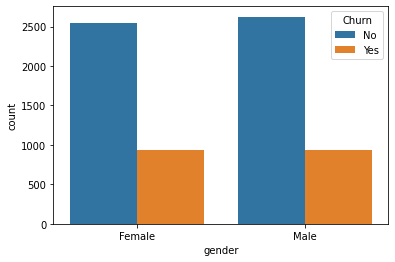

In [ ]:
#Visualize the churn count for both Males and Females
sns.countplot(x='gender', hue='Churn',data = df_1)

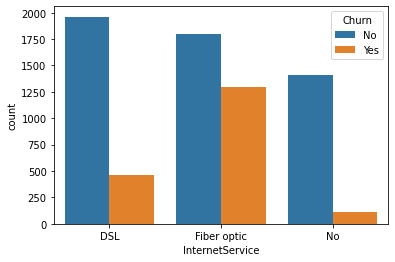

In [ ]:
#Visualize the churn count for the internet service
sns.countplot(x='InternetService', hue='Churn', data = df_1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f6f8b70d0>,
      dtype=object)

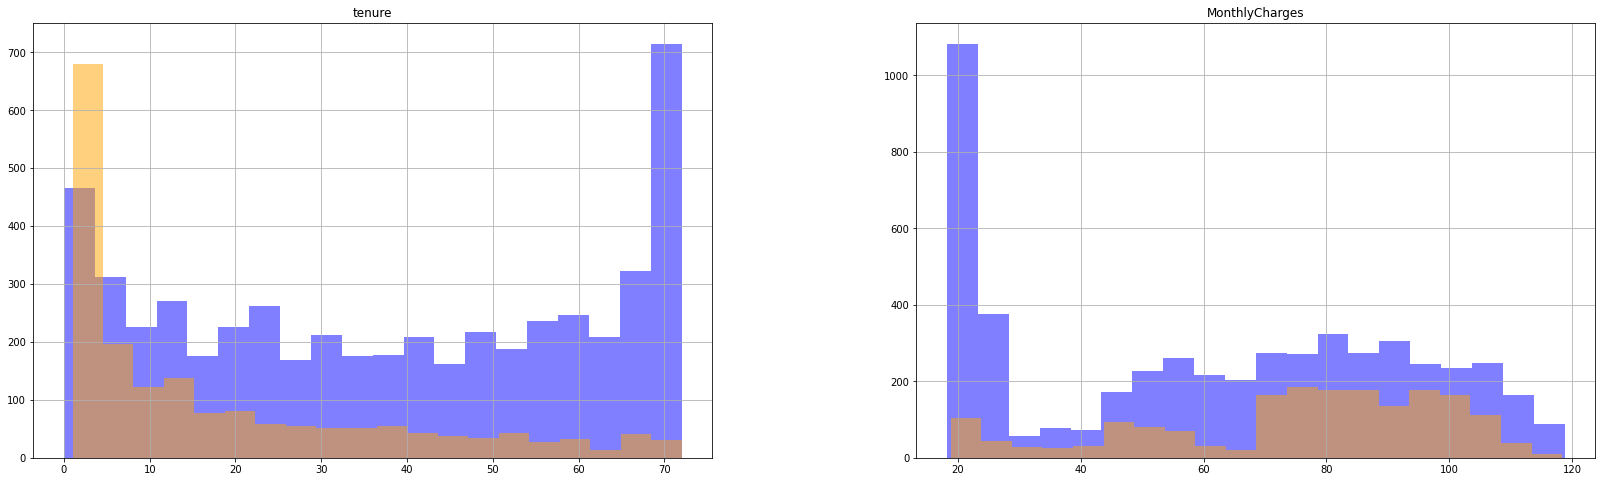

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df_1[df_1.Churn == 'No'][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df_1[df_1.Churn == 'Yes'][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

**DATA PROCESSING AND CLEANING**

In [ ]:
#Remove the unnecessary column customerID
cleaned_df_1 = df_1 = df_1.drop('customerID', axis=1)


In [ ]:
# Customer ID removed
cleaned_df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
cleaned_df_1.shape

(7043, 20)

In [ ]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df_1.columns:
   if cleaned_df_1[column].dtype == np.number:
      continue
   cleaned_df_1[column] = LabelEncoder().fit_transform(cleaned_df_1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Check the new data set data types
cleaned_df_1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [ ]:
#Show the first 5 rows of the new data set
cleaned_df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
#Scale the cleaned data
X = cleaned_df_1.drop('Churn', axis = 1) 
y = cleaned_df_1['Churn']
#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

In [ ]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

**CREATE THE MODEL**

In [ ]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-1.02516569e+00 -4.37749204e-01 -9.69578591e-01 ...  1.33926673e+00
  -4.73723375e-04 -1.40800618e+00]
 [-1.02516569e+00 -4.37749204e-01 -9.69578591e-01 ... -1.47094882e+00
   1.07475386e+00  5.58360318e-01]
 [ 9.75452077e-01 -4.37749204e-01  1.03137591e+00 ...  4.02528212e-01
  -1.37649913e+00 -7.02892284e-01]
 ...
 [ 9.75452077e-01 -4.37749204e-01  1.03137591e+00 ...  4.02528212e-01
  -1.45294499e+00 -3.21706651e-01]
 [ 9.75452077e-01  2.28441306e+00 -9.69578591e-01 ...  4.02528212e-01
   1.14953785e+00 -1.53524478e+00]
 [ 9.75452077e-01 -4.37749204e-01 -9.69578591e-01 ... -5.34210304e-01
  -1.49781538e+00  3.30921324e-01]]


In [ ]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.03963599 0.02917635 0.03491615 0.02834521 0.14275214 0.00685564
 0.02462045 0.03091168 0.05949721 0.02923749 0.02805077 0.0364456
 0.02340426 0.02358654 0.13176955 0.03174794 0.06346109 0.11353842
 0.12204752]


In [ ]:
#Create the model
model = LogisticRegression()
#Train the model
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**MODEL EVALUATION**

In [ ]:
predictions = model.predict(x_test)
#printing the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [ ]:
#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[943  93]
 [194 179]]
0.7963094393186657


In [ ]:
#pickling the model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)